In [48]:
% pylab inline
import pandas as pd
import sqlite3
import seaborn as sns
import datetime

Populating the interactive namespace from numpy and matplotlib


In [85]:
db = sqlite3.connect("/Users/onyame/Dropbox/QuantifiedSelf/btle_backup_19092015_1551.sqlite")

In [109]:
df = pd.read_sql("SELECT * from devices", db,index_col='id', parse_dates=['lastseen'])

In [110]:
df = df.set_index('lastseen')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4468 entries, 2015-05-22 12:25:01 to 2015-09-19 15:48:31
Data columns (total 14 columns):
address                          4468 non-null object
addresstype                      0 non-null object
devicename                       706 non-null object
devicetype                       4468 non-null object
firstseen                        4468 non-null object
scanresp                         0 non-null object
manufacturerspecificdatakey      3820 non-null float64
manufacturerspecificdatafield    3823 non-null object
servicesuuid16                   0 non-null object
servicesuuid32                   0 non-null object
servicesuuid128                  1519 non-null object
solicitedservicesuuid16          0 non-null object
solicitedservicesuuid128         0 non-null object
servicedata                      422 non-null object
dtypes: float64(1), object(13)
memory usage: 523.6+ KB


In [111]:
# http://stackoverflow.com/a/12910278/1181583
start = datetime.datetime(2015, 9, 18)
end = datetime.datetime(2015, 9, 19, 15, 48)
ble_df = df.between_time(start,end)

In [112]:
ble_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3136 entries, 2015-05-22 12:25:01 to 2015-09-19 15:43:37
Data columns (total 14 columns):
address                          3136 non-null object
addresstype                      0 non-null object
devicename                       502 non-null object
devicetype                       3136 non-null object
firstseen                        3136 non-null object
scanresp                         0 non-null object
manufacturerspecificdatakey      2676 non-null float64
manufacturerspecificdatafield    2678 non-null object
servicesuuid16                   0 non-null object
servicesuuid32                   0 non-null object
servicesuuid128                  1174 non-null object
solicitedservicesuuid16          0 non-null object
solicitedservicesuuid128         0 non-null object
servicedata                      313 non-null object
dtypes: float64(1), object(13)
memory usage: 367.5+ KB


In [115]:
ble_df['devicetype'] = ble_df['devicetype'].str.replace('\(.*\)', '', case=False)

/Users/onyame/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [116]:
# Recognize some devices by name
for i in ble_df.index:
    if ble_df.devicename[i] != None:
        if ble_df.devicename[i][:4] == "oura":
            print ble_df.devicename[i]
            ble_df.devicetype[i] = 'Oura'

        if ble_df.devicename[i][:8] == "estimote":
            print ble_df.devicename[i]
            ble_df.devicetype[i] = 'Estimote Beacon'
            
        
        if ble_df.devicename[i][:3] == "UP3":
            print ble_df.devicename[i]
            ble_df.devicetype[i] = 'Jawbone UP3'

/Users/onyame/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/onyame/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


estimote


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [117]:
device_types = ble_df.groupby('devicetype').size()
device_names = ble_df.groupby('devicename').size()

In [118]:
device_types

devicetype
Apple device              1819
Chipolo tracker              1
Ericsson device              2
Estimote Beacon              1
Fitbit Charge               27
Fitbit Charge HR            75
Fitbit Flex                 46
Fitbit One                  57
Garmin Device               20
Garmin Vivosmart             3
Google device                1
HTC RECAM                    2
Jawbone UP24                14
Jawbone device               1
MI                          14
Misfit Wearables Corp       13
Nike device                 11
Nordic device                1
Samsung device              86
Unknown 0x35EE device        2
Unknown device             907
Withings device             33
dtype: int64

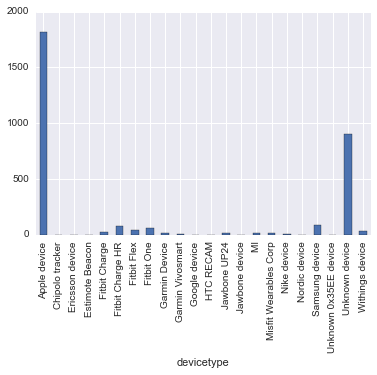

In [119]:
device_types.plot(kind='bar')

In [120]:
device_types.keys()

Index([         u'Apple device ',       u'Chipolo tracker ',
             u'Ericsson device ',        u'Estimote Beacon',
               u'Fitbit Charge ',      u'Fitbit Charge HR ',
                 u'Fitbit Flex ',            u'Fitbit One ',
               u'Garmin Device ',      u'Garmin Vivosmart ',
               u'Google device ',             u'HTC RECAM ',
                u'Jawbone UP24 ',        u'Jawbone device ',
                          u'MI ', u'Misfit Wearables Corp ',
                 u'Nike device ',         u'Nordic device ',
              u'Samsung device ', u'Unknown 0x35EE device ',
               u'Unknown device',       u'Withings device '],
      dtype='object', name=u'devicetype')

In [121]:
devices = device_types.drop([u'Apple device ',u'Samsung device ', u'Unknown device'])


In [122]:
devices

devicetype
Chipolo tracker            1
Ericsson device            2
Estimote Beacon            1
Fitbit Charge             27
Fitbit Charge HR          75
Fitbit Flex               46
Fitbit One                57
Garmin Device             20
Garmin Vivosmart           3
Google device              1
HTC RECAM                  2
Jawbone UP24              14
Jawbone device             1
MI                        14
Misfit Wearables Corp     13
Nike device               11
Nordic device              1
Unknown 0x35EE device      2
Withings device           33
dtype: int64

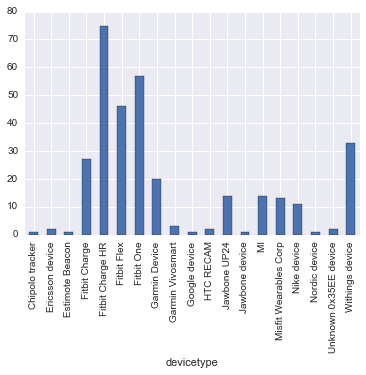

In [123]:
devices.plot(kind='bar')